In [ ]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import plotly.express as px
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.manifold import TSNE
from statsmodels.tsa.seasonal import seasonal_decompose

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
!pip install -q xlrd

In [ ]:
dates = pd.date_range(start='2020-08', end='2022-10', freq="M")

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx')

In [ ]:
data = data.set_index('Merchant Name')

In [ ]:
merchant_id = data.index

In [ ]:
data.columns = dates

# MIN-MAX Scaling

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [ ]:
scaled=pd.DataFrame(scaler.fit_transform(data.T).T,columns=data.columns)

In [ ]:
r_seed = 42

In [ ]:
X = scaled.values

# KMEANS

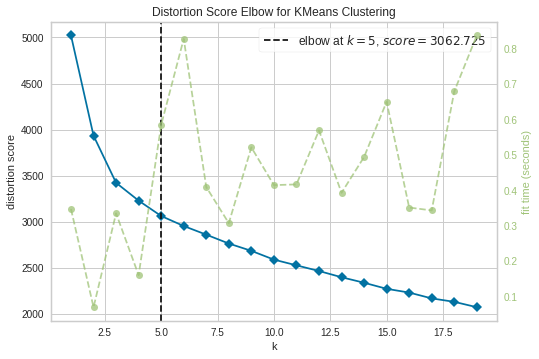

In [ ]:
model = KMeans(random_state=r_seed, verbose=0)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)
visualizer.poof()

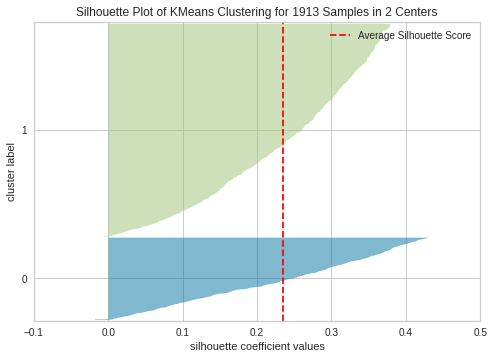

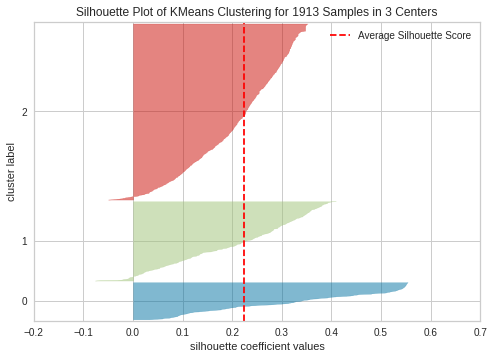

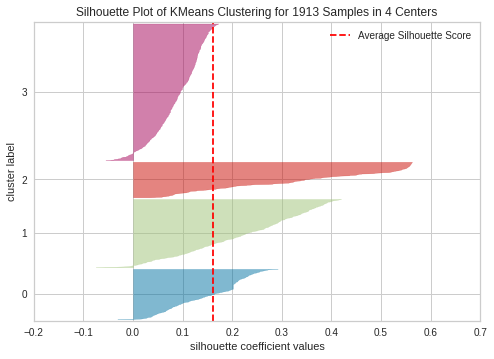

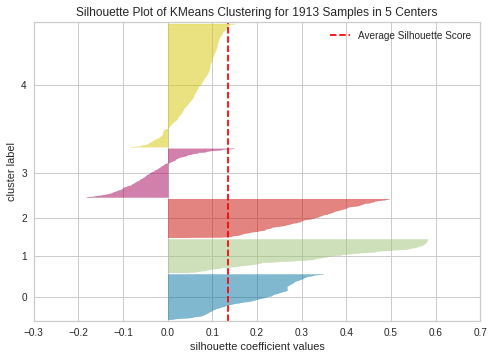

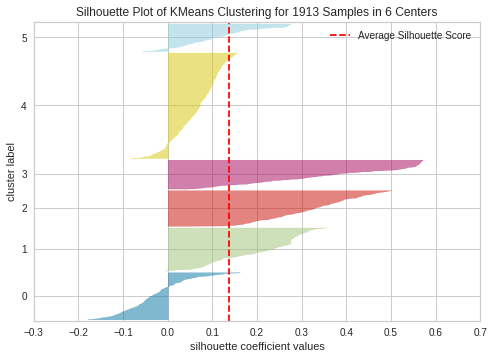

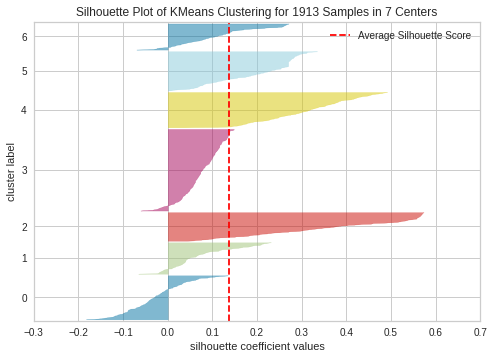

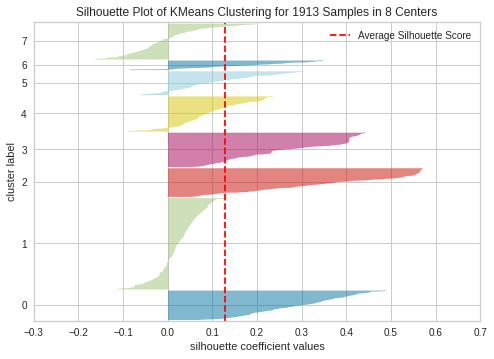

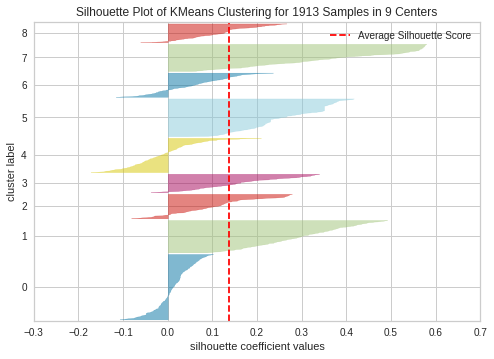

In [ ]:
for c in range(2,10):
    model = KMeans(c, random_state=r_seed, verbose=0)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

# TSNE visualisation 2D

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, random_state=250)
X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1913 samples in 0.000s...
[t-SNE] Computed neighbors for 1913 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1913
[t-SNE] Computed conditional probabilities for sample 1913 / 1913
[t-SNE] Mean sigma: 1.173262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.572197
[t-SNE] KL divergence after 1000 iterations: 0.802320


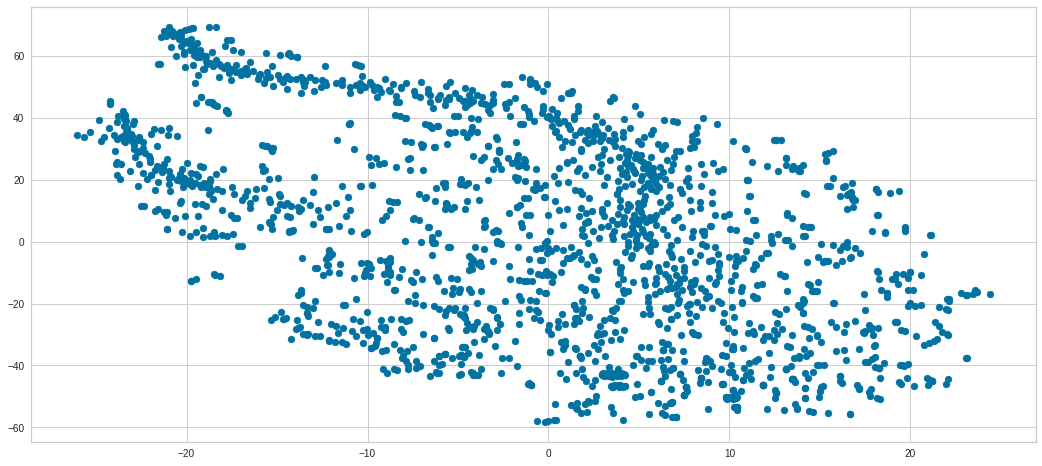

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

# 5 clusters visualization

In [ ]:
n_clusters = 5
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_id.astype(str))

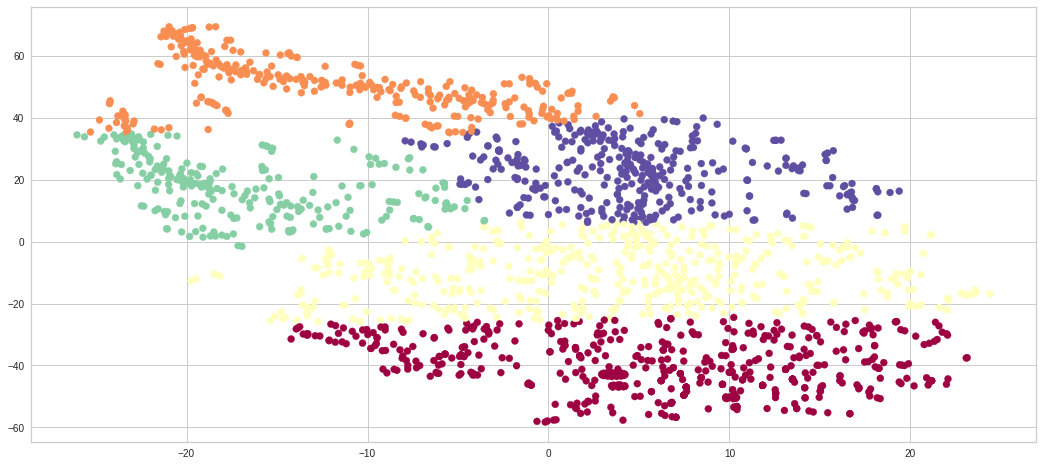

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

# 4 Cluster visualization

In [ ]:
n_clusters = 4
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_id.astype(str))

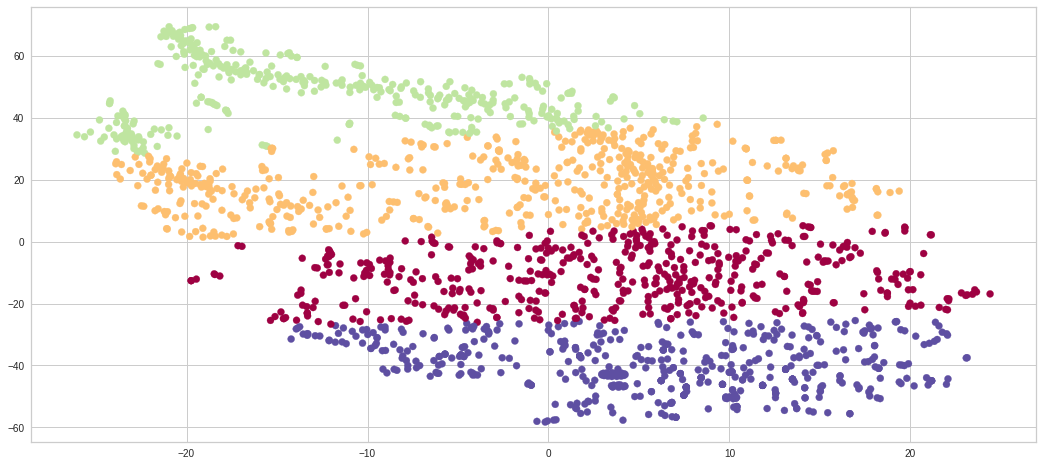

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

# 8 Cluster visualization

In [ ]:
n_clusters = 8
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_id.astype(str))

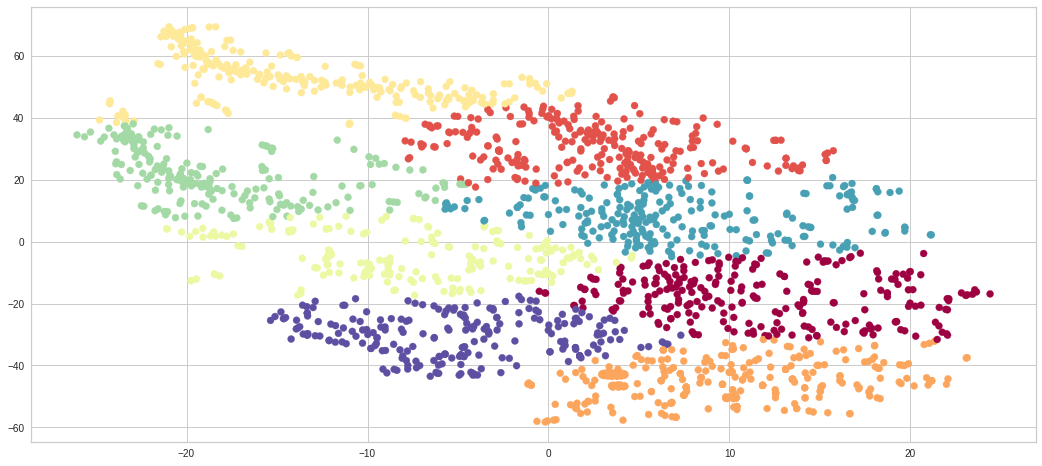

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

# TSNE 3D

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000, random_state=250)
X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1913 samples in 0.000s...
[t-SNE] Computed neighbors for 1913 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1913
[t-SNE] Computed conditional probabilities for sample 1913 / 1913
[t-SNE] Mean sigma: 1.173262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.811684
[t-SNE] KL divergence after 1000 iterations: 0.632727


In [ ]:
fig = px.scatter_3d(
    X_tsne, x=0, y=1, z=2,
    #color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

# 5 cluster 3D visualization

In [ ]:
n_clusters = 5
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_id.astype(str))

In [ ]:
fig = px.scatter_3d(
    X_tsne, x=0, y=1, z=2,
    color=data_res["cluster"].values, labels={'color': 'cluster'}
)
fig.update_traces(marker_size=8)
fig.show()

# Exploration of time series of the clusters created with K-means

In [ ]:
data_res.groupby('cluster').mean()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
cluster,,,,,,,,,,,,,,,,,,,,,
0,149.174603,193.640212,171.746032,199.211640,219.214286,224.611111,304.796296,337.936508,199.923280,200.989418,...,337.134921,279.309524,393.917989,519.023810,247.592593,323.206349,426.669312,276.343915,253.920635,432.542328
1,11.739130,12.081285,18.489603,21.398866,20.487713,14.538752,15.937618,14.052930,15.593573,17.846881,...,28.077505,20.648393,25.189036,22.241966,22.538752,32.701323,31.659735,25.066163,21.655955,29.468809
2,37.238281,46.527344,190.699219,36.808594,41.050781,346.031250,73.019531,56.707031,256.449219,41.722656,...,47.027344,491.378906,64.003906,59.042969,319.933594,70.128906,44.613281,389.527344,36.195312,42.187500
3,1.510917,1.683406,1.279476,0.805677,0.975983,0.591703,0.467249,0.934498,0.434498,0.338428,...,0.788210,0.659389,1.220524,0.521834,0.604803,0.524017,0.748908,1.045852,1.069869,1.065502
4,20240.743151,18747.482877,19198.804795,20702.339041,23853.993151,21538.448630,21348.578767,21387.746575,20353.852740,23026.407534,...,28246.424658,26031.688356,25326.106164,24475.565068,23969.880137,29131.773973,23860.140411,24671.339041,26541.565068,25754.493151


# time series visualization for each cluster

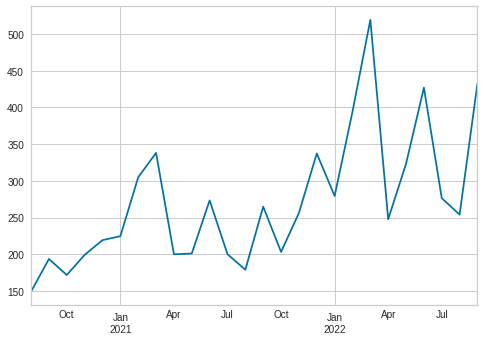

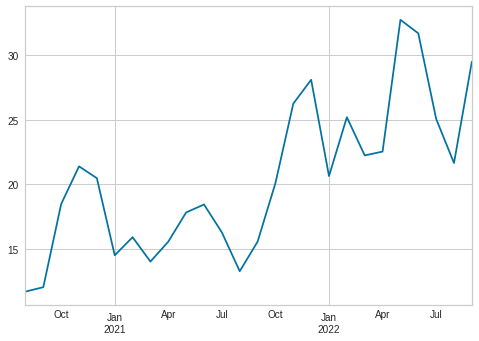

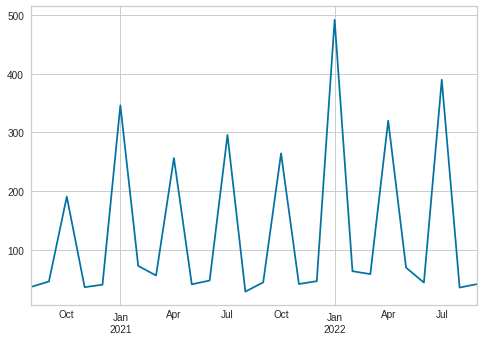

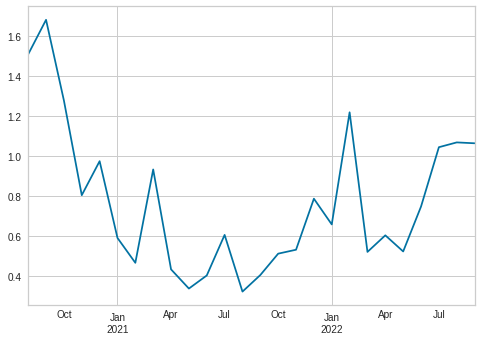

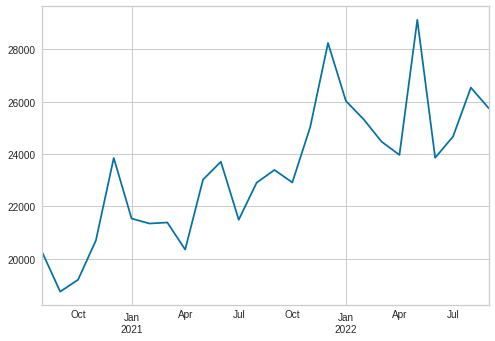

In [ ]:
for i in range(5):
  data_res.groupby('cluster').mean().iloc[i].plot()
  plt.show()

In [ ]:
seasonal_decompose(data_res.groupby('cluster').mean().iloc[0], model='multiplicative').plot()

In [ ]:
for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative')
  plt.rc('figure',figsize=(12,6))
  plt.rc('font',size=15)
  fig, ax = plt.subplots()
  x = output.resid.index
  y = output.resid.values
  ax.plot_date(x, y, 
               #color='black',
               linestyle='--')
fig.autofmt_xdate()
plt.show()

# Residuals

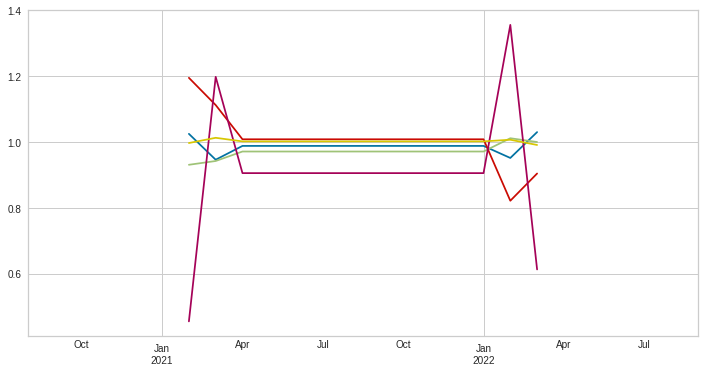

In [ ]:
for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').resid
  output.plot()
plt.show()

# Trend

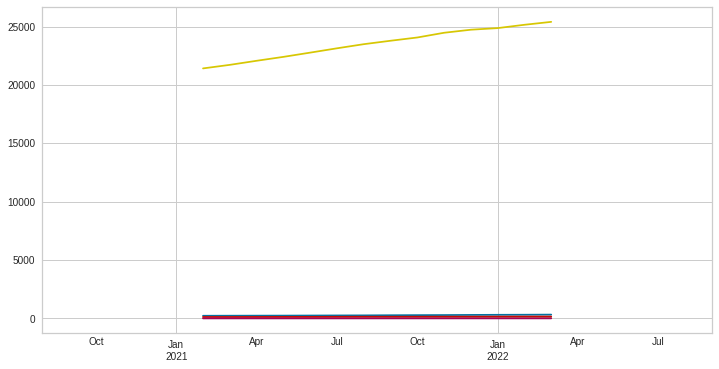

In [ ]:
for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').trend
  output.plot()
plt.show()

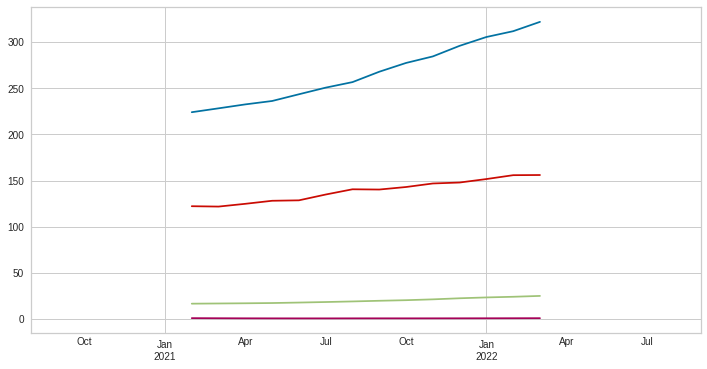

In [ ]:
for i in range(4):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').trend
  output.plot()
plt.show()

# Seasonality

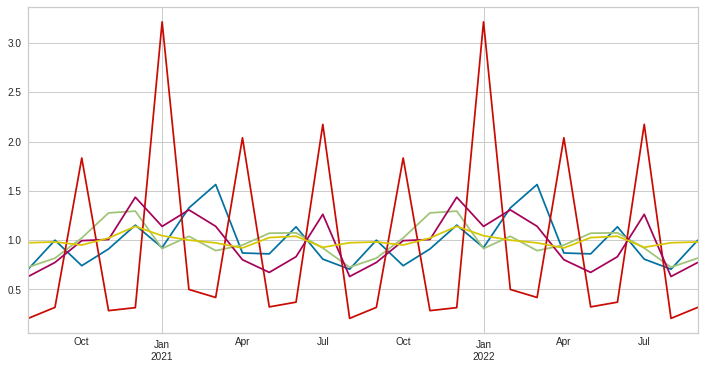

In [ ]:
for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').seasonal
  output.plot()
plt.show()

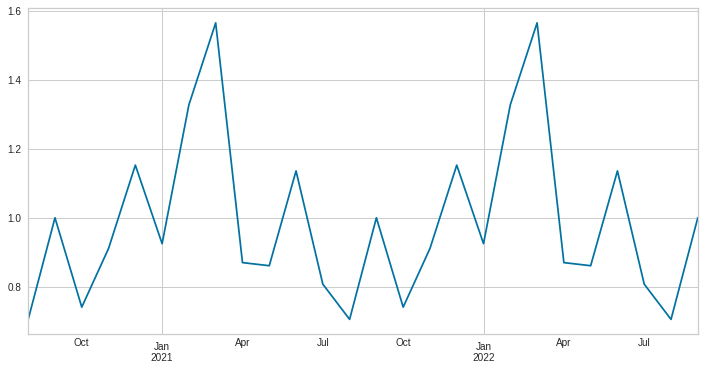

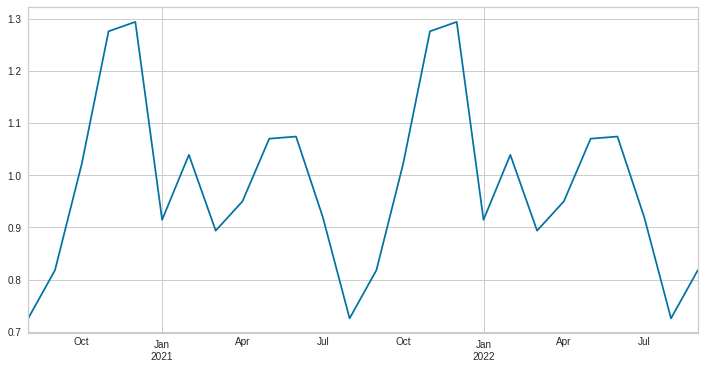

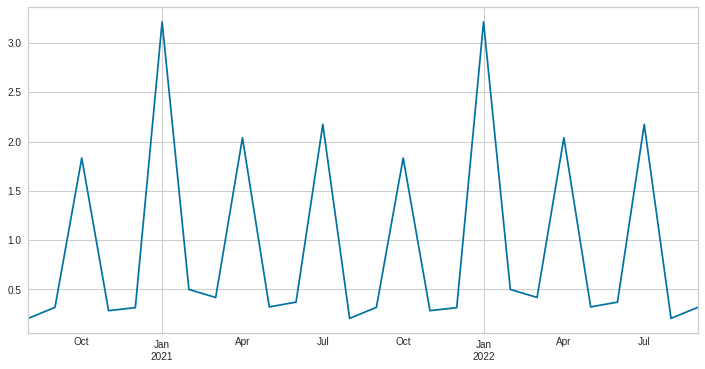

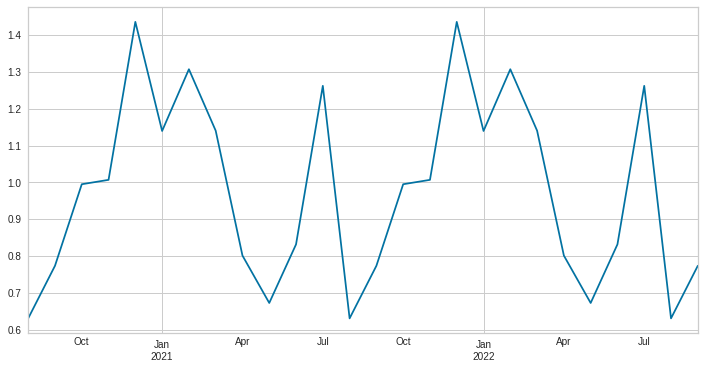

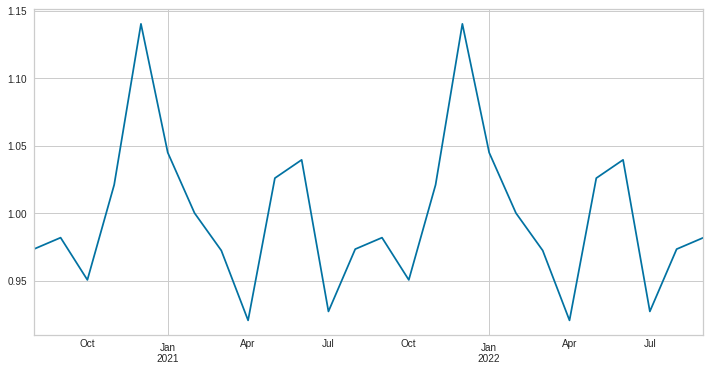

In [ ]:
for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').seasonal
  output.plot()
  plt.show()

# Clusters and the number of zeros

In [ ]:
data_res["no_0"]=data_res.drop(columns='cluster').eq(0).sum(axis=1)

In [ ]:
data_res.head(3)

,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2022-02-28 00:00:00,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,cluster,no_0
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0,4,0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0,2,0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0,1,12


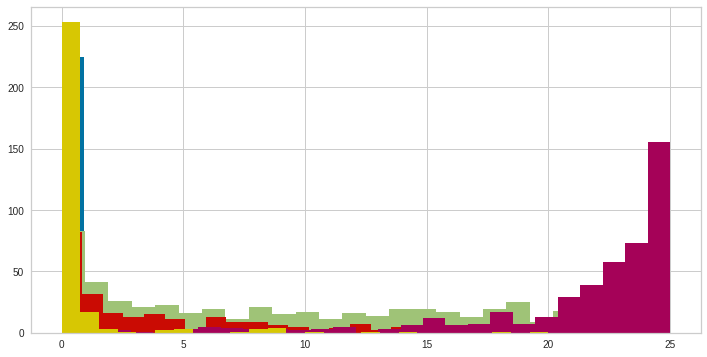

In [ ]:
for i in range(5):
  data_res[data_res["cluster"]==i]['no_0'].hist(bins=26)
plt.show()

cluster 0
378


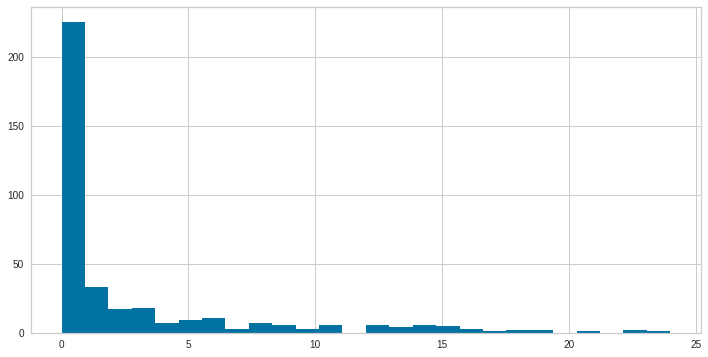

cluster 1
529


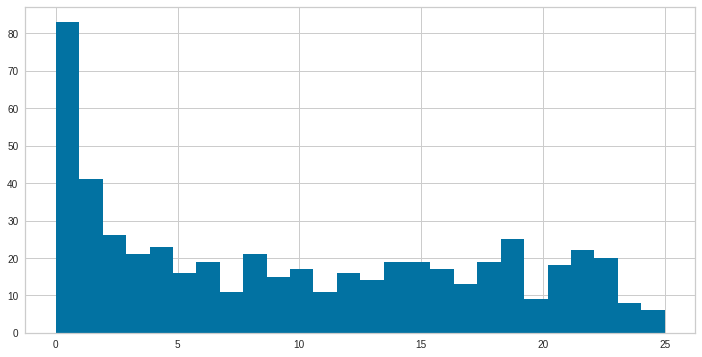

cluster 2
256


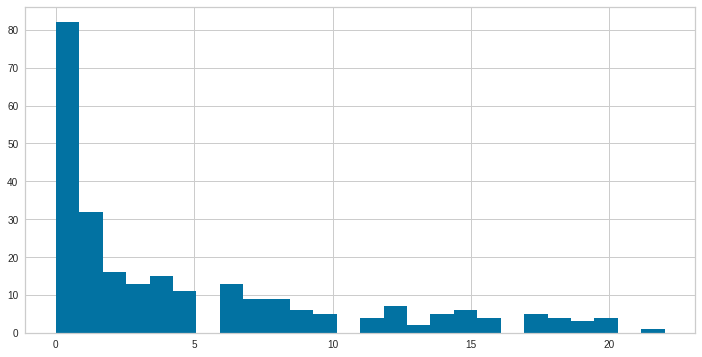

cluster 3
458


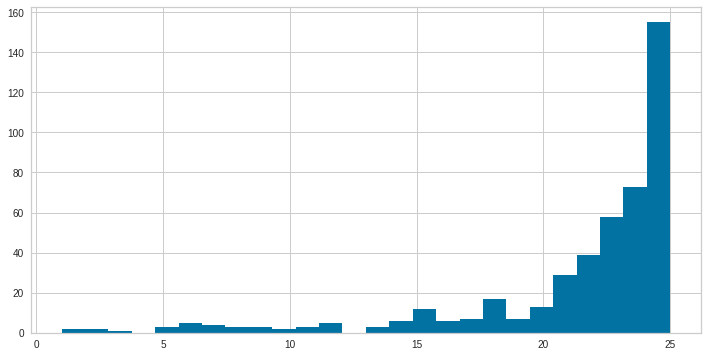

cluster 4
292


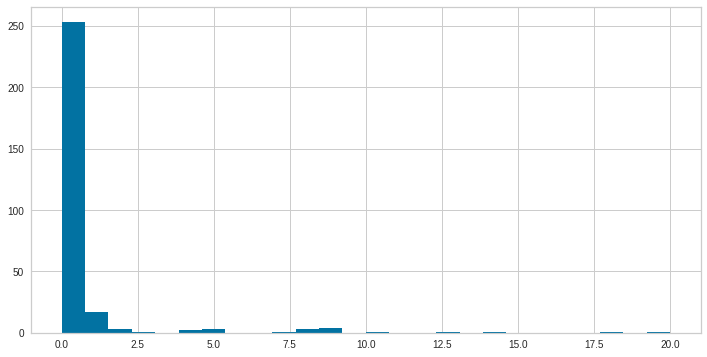

In [ ]:
for i in range(5):
  print("cluster",i)
  print(len(data_res[data_res["cluster"]==i]['no_0']))
  data_res[data_res["cluster"]==i]['no_0'].hist(bins=26)
  plt.show()